In [2]:
import pandas as pd
import numpy as np
import spacy
from collections import Counter

### Dataset creation

In [3]:
df_1 = pd.read_csv('/content/ELLIPSE_Final_github_train.csv', index_col=0)

In [4]:
df_1

,full_text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,num_word_div_para,...,SES,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions,set
text_id_kaggle,,,,,,,,,,,,,,,,,,,,,
5661280443,Imagine if you could prove other people that y...,Male,8,Hispanic/Latino,420,431,431,18,4,107.750000,...,Economically disadvantaged,Benefits of a problem,4.0,3.5,4.0,3.5,3.5,4.0,4.0,train
0016926B079C,I think that students would benefit from learn...,Male,12,Black/African American,246,264,261,18,4,65.250000,...,Economically disadvantaged,Distance learning,3.5,3.5,3.5,3.0,3.0,4.0,3.0,train
0022683E9EA5,When a problem is a change you have to let it ...,Female,8,Hispanic/Latino,513,536,533,14,6,88.833333,...,Not economically disadvantaged,Benefits of a problem,2.5,2.5,2.5,3.0,2.0,2.0,2.5,train
00299B378633,"Dear, Principal\n\nIf u change the school poli...",Male,8,Hispanic/Latino,310,330,320,19,2,160.000000,...,Economically disadvantaged,Grades for extracurricular activities,3.0,3.0,3.5,3.0,3.0,3.0,2.5,train
003885A45F42,The best time in life is when you become yours...,Male,12,White,734,757,728,36,8,91.000000,...,Not economically disadvantaged,Individuality,4.5,4.5,4.5,4.5,4.5,4.0,5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782678016796,Students believe in praising them builds their...,Male,11,Black/African American,221,243,238,12,6,39.666667,...,Not economically disadvantaged,Praising student work,3.0,3.5,3.0,3.0,2.5,3.0,3.5,train
833489139971,Former British Minister Winston Churchill once...,Male,11,Hispanic/Latino,772,197,197,11,3,65.666667,...,Economically disadvantaged,Success and failure,3.5,3.5,3.5,3.0,3.5,4.0,3.5,train
856351253492,"Author Ralph Waldo Emerson wrote, ""Unless you ...",Female,10,Hispanic/Latino,738,710,700,27,9,77.777778,...,Economically disadvantaged,Trying something beyond what you have mastered,2.5,2.0,3.0,2.5,2.0,2.5,3.0,train


In [5]:
df_2 = pd.read_csv('/content/ELLIPSE_Final_github_test.csv', index_col=0)

In [6]:
df_2

,full_text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,num_word_div_para,...,SES,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions,set
text_id_kaggle,,,,,,,,,,,,,,,,,,,,,
26650408983,People are discussing about the limitation of ...,Female,11,Hispanic/Latino,486,556,552,12,9,61.333333,...,Not economically disadvantaged,Impact of technology,2.5,2.5,2.0,3.0,2.0,2.5,3.0,test
60346336449,"As being the youngest child, I have gained wis...",Male,8,Asian/Pacific Islander,405,434,427,15,5,85.400000,...,Not economically disadvantaged,Learning from the experience of others,3.5,3.5,3.5,3.0,3.5,3.5,3.5,test
92767513178,I think people could do one of both if they ne...,Male,11,Black/African American,266,266,265,8,5,53.000000,...,Economically disadvantaged,Self-reliance,2.5,2.0,2.0,3.0,2.0,2.5,3.0,test
1.99E+11,The success is depends on your attitude\n\nYes...,Male,12,Asian/Pacific Islander,498,471,466,19,12,38.833333,...,Not economically disadvantaged,Positive attitudes,3.5,4.0,3.5,4.0,3.0,3.0,3.5,test
2.45E+11,To be somebody in a world that would make some...,Male,12,Asian/Pacific Islander,265,253,251,14,5,50.200000,...,Not economically disadvantaged,Individuality,3.0,3.0,3.0,3.5,3.5,3.0,3.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAB2B88C059F,Some schools offer distance learning as a opti...,Male,12,Hispanic/Latino,322,336,335,8,7,47.857143,...,Economically disadvantaged,Distance learning,3.0,2.5,2.0,3.0,3.5,3.0,3.0,test
FB4FE2503800,I disagree that attend classes from home can b...,Male,12,Hispanic/Latino,268,278,278,13,1,278.000000,...,Economically disadvantaged,Distance learning,3.0,3.0,3.0,2.5,3.5,3.5,3.0,test
FCE4AFE078FF,Introduction in my opinion kids should not sta...,Male,8,Hispanic/Latino,357,375,375,20,8,46.875000,...,Economically disadvantaged,Mandatory extracurricular activities,3.0,3.0,3.0,4.0,3.0,3.5,3.0,test


In [7]:
df_pre = pd.concat([df_1, df_2])

In [8]:
df_pre = df_pre.drop(['set'], axis=1).reset_index()

In [9]:
df_pre = df_pre.drop(['text_id_kaggle'], axis=1)

### Feature generation

In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
global_word_bigram_counts = Counter()
global_word_trigram_counts = Counter()
global_pos_bigram_counts = Counter()
global_pos_trigram_counts = Counter()

In [12]:
import numpy as np
from collections import Counter

def text_stats(doc):
    word_thresholds = [4, 6, 8, 10, 12]
    word_thresh_counts = [0]*5
    all_word_lengths = []
    unique_words = set()
    alpha_tokens = []  # (lower_text, POS)

    sent_thresholds = [10, 18, 25]
    sent_thresh_counts = [0]*3
    sent_lengths = []

    norm_subclause_rates = []
    subclause_lengths = []
    norm_modals = []
    norm_preps = []
    norm_punct = []

    for sent in doc.sents:
        tok_count = 0
        subcl_count = 0
        modals = preps = punct = 0

        for token in sent:
            if token.is_alpha:
                text = token.text.lower()
                pos = token.pos_
                L = len(text)
                all_word_lengths.append(L)
                alpha_tokens.append((text, pos))
                tok_count += 1
                if text not in unique_words:
                    unique_words.add(text)
                for i, T in enumerate(word_thresholds):
                    if L >= T:
                        word_thresh_counts[i] += 1

            if token.dep_ in {"mark", "relcl", "advcl", "ccomp", "xcomp"}:
                subcl_count += 1
                subclause_lengths.append(len(list(token.subtree)))
            if token.dep_ == 'aux' and token.tag_ == 'MD':
                modals += 1
            if token.dep_ == 'prep':
                preps += 1
            if token.is_punct:
                punct += 1

        if tok_count == 0:
            continue

        sent_lengths.append(tok_count)
        for i, T in enumerate(sent_thresholds):
            if tok_count >= T:
                sent_thresh_counts[i] += 1

        norm_subclause_rates.append(subcl_count / tok_count)
        norm_modals.append(modals / tok_count)
        norm_preps.append(preps / tok_count)
        norm_punct.append(punct / tok_count)

    wl = np.array(all_word_lengths, dtype=float)
    sl = np.array(sent_lengths,     dtype=float)

    word_bigrams   = [(alpha_tokens[i][0], alpha_tokens[i+1][0]) for i in range(len(alpha_tokens) - 1)]
    word_trigrams  = [(alpha_tokens[i][0], alpha_tokens[i+1][0], alpha_tokens[i+2][0]) for i in range(len(alpha_tokens) - 2)]
    pos_bigrams    = [(alpha_tokens[i][1], alpha_tokens[i+1][1]) for i in range(len(alpha_tokens) - 1)]
    pos_trigrams   = [(alpha_tokens[i][1], alpha_tokens[i+1][1], alpha_tokens[i+2][1]) for i in range(len(alpha_tokens) - 2)]

    result = {
        # word‑level
        'avg_word_length':     float(wl.mean()) if wl.size else 0.0,
        'var_word_length':     float(wl.var())  if wl.size else 0.0,
        'words_longer_four':   word_thresh_counts[0],
        'words_longer_six':    word_thresh_counts[1],
        'words_longer_eight':  word_thresh_counts[2],
        'words_longer_ten':    word_thresh_counts[3],
        'words_longer_twelve': word_thresh_counts[4],

        # sentence‑level
        'sent_lengths_10':        sent_thresh_counts[0],
        'sent_lengths_18':        sent_thresh_counts[1],
        'sent_lengths_25':        sent_thresh_counts[2],
        'sent_avg_length':        float(sl.mean()) if sl.size else 0.0,
        'sent_var_length':        float(sl.var())  if sl.size else 0.0,
        'avg_num_subclauses_norm': np.mean(norm_subclause_rates) if norm_subclause_rates else 0.0,
        'avg_len_subclauses':      np.mean(subclause_lengths)   if subclause_lengths   else 0.0,
        'avg_modals_normalized':   np.mean(norm_modals)         if norm_modals         else 0.0,
        'avg_preps_normalized':    np.mean(norm_preps)          if norm_preps          else 0.0,
        'avg_punct_normalized':    np.mean(norm_punct)          if norm_punct          else 0.0,

        # text-level
        'word_count': len(wl),
        'char_count': len(doc.text),
        'unique_word_count': len(unique_words),

        # word bigrams and trigrams
        'word_bigram_counts': Counter(word_bigrams),
        'word_trigram_counts': Counter(word_trigrams),

        # pos bigrams and trigrams
        'pos_bigram_counts': Counter(pos_bigrams),
        'pos_trigram_counts': Counter(pos_trigrams),
    }

    return result


In [13]:
ds = []
for text in df_pre['full_text']:
    doc = nlp(text)
    res = text_stats(doc)
    ds.append(res)
    global_word_bigram_counts.update(res['word_bigram_counts'])
    global_word_trigram_counts.update(res['word_trigram_counts'])
    global_pos_bigram_counts.update(res['pos_bigram_counts'])
    global_pos_trigram_counts.update(res['pos_trigram_counts'])

total_word_bigrams = sum(global_word_bigram_counts.values())
global_word_bigram_tf = {bigram: count / total_word_bigrams for bigram, count in global_word_bigram_counts.items()}

total_word_trigrams = sum(global_word_trigram_counts.values())
global_word_trigram_tf = {trigram: count / total_word_trigrams for trigram, count in global_word_trigram_counts.items()}

total_pos_bigrams = sum(global_pos_bigram_counts.values())
global_pos_bigram_tf = {bigram: count / total_pos_bigrams for bigram, count in global_pos_bigram_counts.items()}

total_pos_trigrams = sum(global_pos_trigram_counts.values())
global_pos_trigram_tf = {trigram: count / total_pos_trigrams for trigram, count in global_pos_trigram_counts.items()}

df_new = pd.DataFrame(ds)

In [14]:
def tf_features(local_ngrams, global_ngrams_tf):
    total_ngrams = sum(local_ngrams.values())
    local_ngrams_tf = {bigram: count / total_ngrams for bigram, count in local_ngrams.items()}

    ngrams_ratios = {key: local_ngrams_tf[key] / global_ngrams_tf[key] for key in local_ngrams_tf if key in global_ngrams_tf}
    tf_ratio_ngrams = np.mean(list(ngrams_ratios.values()))
    return tf_ratio_ngrams

In [15]:
tf_ratio_word_bigram = df_new['word_bigram_counts'].apply(lambda x: tf_features(x, global_word_bigram_tf))
tf_ratio_word_trigram = df_new['word_trigram_counts'].apply(lambda x: tf_features(x, global_word_trigram_tf))

tf_ratio_pos_bigram = df_new['pos_bigram_counts'].apply(lambda x: tf_features(x, global_pos_bigram_tf))
tf_ratio_pos_trigram = df_new['pos_trigram_counts'].apply(lambda x: tf_features(x, global_pos_trigram_tf))

In [16]:
df_new['tf_ratio_word_bigram'] = tf_ratio_word_bigram
df_new['tf_ratio_word_trigram'] = tf_ratio_word_trigram
df_new['tf_ratio_pos_bigram'] = tf_ratio_pos_bigram
df_new['tf_ratio_pos_trigram'] = tf_ratio_pos_trigram

In [17]:
df_new = df_new.drop(['word_bigram_counts', 'word_trigram_counts', 'pos_bigram_counts', 'pos_trigram_counts'], axis=1)

In [18]:
df_new

,avg_word_length,var_word_length,words_longer_four,words_longer_six,words_longer_eight,words_longer_ten,words_longer_twelve,sent_lengths_10,sent_lengths_18,sent_lengths_25,...,avg_modals_normalized,avg_preps_normalized,avg_punct_normalized,word_count,char_count,unique_word_count,tf_ratio_word_bigram,tf_ratio_word_trigram,tf_ratio_pos_bigram,tf_ratio_pos_trigram
0,4.266667,4.577165,259,107,35,7,3,18,12,10,...,0.049247,0.063143,0.066954,435,2317,109,1254.893461,3132.691677,1.537062,5.790256
1,4.063670,3.872351,154,57,16,5,0,11,5,3,...,0.045367,0.059434,0.093017,267,1387,130,1546.321274,5828.006549,1.738246,7.887585
2,3.872897,4.458611,243,110,39,11,0,20,16,11,...,0.027383,0.060190,0.042822,535,2635,134,452.649281,2066.952169,2.468856,14.168887
3,3.975385,4.171702,184,76,18,8,0,17,10,2,...,0.030290,0.064994,0.087846,325,1663,110,1114.334671,4298.734780,2.318318,16.026845
4,4.237964,4.709535,415,170,55,19,7,32,21,8,...,0.017434,0.048573,0.125828,727,3973,199,497.759267,1654.270131,1.666789,5.695199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,4.535714,5.022534,216,108,36,8,3,8,6,6,...,0.031348,0.118805,0.095700,336,1886,117,904.847155,2879.215741,1.798651,5.416057
6478,4.457143,5.319592,159,87,31,10,1,13,7,4,...,0.059070,0.113073,0.075518,280,1545,132,1629.995330,4667.047154,1.949613,9.374072
6479,4.240838,4.172364,237,90,24,6,3,21,6,5,...,0.040150,0.114526,0.064235,382,2023,155,1540.669913,3945.727271,1.551957,4.610126
6480,4.531381,5.721819,150,66,23,10,4,12,4,1,...,0.013785,0.100716,0.121755,239,1406,128,2217.644670,6681.349693,1.850974,6.721453


In [19]:
df_new.columns

Index(['avg_word_length', 'var_word_length', 'words_longer_four',
       'words_longer_six', 'words_longer_eight', 'words_longer_ten',
       'words_longer_twelve', 'sent_lengths_10', 'sent_lengths_18',
       'sent_lengths_25', 'sent_avg_length', 'sent_var_length',
       'avg_num_subclauses_norm', 'avg_len_subclauses',
       'avg_modals_normalized', 'avg_preps_normalized', 'avg_punct_normalized',
       'word_count', 'char_count', 'unique_word_count', 'tf_ratio_word_bigram',
       'tf_ratio_word_trigram', 'tf_ratio_pos_bigram', 'tf_ratio_pos_trigram'],
      dtype='object')

In [20]:
df = df_pre.merge(df_new, left_index=True, right_index=True)

In [21]:
df

,full_text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,num_word_div_para,...,avg_modals_normalized,avg_preps_normalized,avg_punct_normalized,word_count,char_count,unique_word_count,tf_ratio_word_bigram,tf_ratio_word_trigram,tf_ratio_pos_bigram,tf_ratio_pos_trigram
0,Imagine if you could prove other people that y...,Male,8,Hispanic/Latino,420,431,431,18,4,107.750000,...,0.049247,0.063143,0.066954,435,2317,109,1254.893461,3132.691677,1.537062,5.790256
1,I think that students would benefit from learn...,Male,12,Black/African American,246,264,261,18,4,65.250000,...,0.045367,0.059434,0.093017,267,1387,130,1546.321274,5828.006549,1.738246,7.887585
2,When a problem is a change you have to let it ...,Female,8,Hispanic/Latino,513,536,533,14,6,88.833333,...,0.027383,0.060190,0.042822,535,2635,134,452.649281,2066.952169,2.468856,14.168887
3,"Dear, Principal\n\nIf u change the school poli...",Male,8,Hispanic/Latino,310,330,320,19,2,160.000000,...,0.030290,0.064994,0.087846,325,1663,110,1114.334671,4298.734780,2.318318,16.026845
4,The best time in life is when you become yours...,Male,12,White,734,757,728,36,8,91.000000,...,0.017434,0.048573,0.125828,727,3973,199,497.759267,1654.270131,1.666789,5.695199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Some schools offer distance learning as a opti...,Male,12,Hispanic/Latino,322,336,335,8,7,47.857143,...,0.031348,0.118805,0.095700,336,1886,117,904.847155,2879.215741,1.798651,5.416057
6478,I disagree that attend classes from home can b...,Male,12,Hispanic/Latino,268,278,278,13,1,278.000000,...,0.059070,0.113073,0.075518,280,1545,132,1629.995330,4667.047154,1.949613,9.374072
6479,Introduction in my opinion kids should not sta...,Male,8,Hispanic/Latino,357,375,375,20,8,46.875000,...,0.040150,0.114526,0.064235,382,2023,155,1540.669913,3945.727271,1.551957,4.610126
6480,"some times, We don't succed in life for reason...",Male,11,Hispanic/Latino,205,247,241,18,16,15.062500,...,0.013785,0.100716,0.121755,239,1406,128,2217.644670,6681.349693,1.850974,6.721453


In [22]:
df.columns

Index(['full_text', 'gender', 'grade', 'race_ethnicity', 'num_words',
       'num_words2', 'num_words3', 'num_sent', 'num_para', 'num_word_div_para',
       'MTLD', 'TTR', 'Type', 'Token', 'task', 'SES', 'prompt', 'Overall',
       'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar',
       'Conventions', 'avg_word_length', 'var_word_length',
       'words_longer_four', 'words_longer_six', 'words_longer_eight',
       'words_longer_ten', 'words_longer_twelve', 'sent_lengths_10',
       'sent_lengths_18', 'sent_lengths_25', 'sent_avg_length',
       'sent_var_length', 'avg_num_subclauses_norm', 'avg_len_subclauses',
       'avg_modals_normalized', 'avg_preps_normalized', 'avg_punct_normalized',
       'word_count', 'char_count', 'unique_word_count', 'tf_ratio_word_bigram',
       'tf_ratio_word_trigram', 'tf_ratio_pos_bigram', 'tf_ratio_pos_trigram'],
      dtype='object')

In [23]:
cols_to_drop = ['gender', 'race_ethnicity', 'num_words',
                'num_words2', 'num_words3', 'num_sent',
                'TTR', 'Type', 'Token', 'task', 'SES',]
df = df.drop(cols_to_drop, axis=1)

In [26]:
df.to_csv('dataset.csv')

### EDA

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df.drop(['full_text', 'prompt'], axis=1))

Output hidden; open in https://colab.research.google.com to view.

<Figure size 1000x600 with 0 Axes>

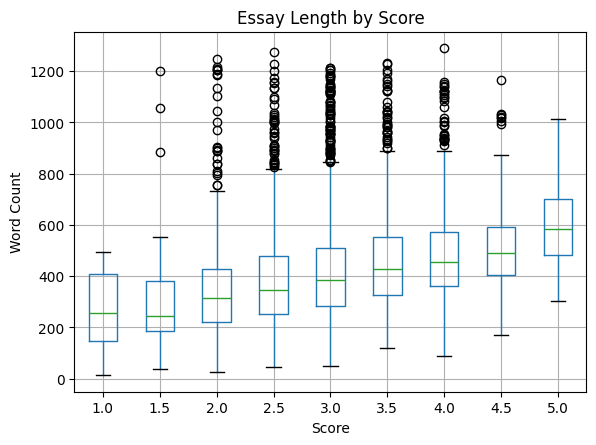

In [28]:
plt.figure(figsize=(10, 6))
df.boxplot(column='word_count', by='Overall')
plt.title('Essay Length by Score')
plt.suptitle('')
plt.xlabel('Score')
plt.ylabel('Word Count')
plt.show()

Виден легкий тренд, но выбросов многовато

In [30]:
df['ttr'] = df['unique_word_count'] / df['word_count']

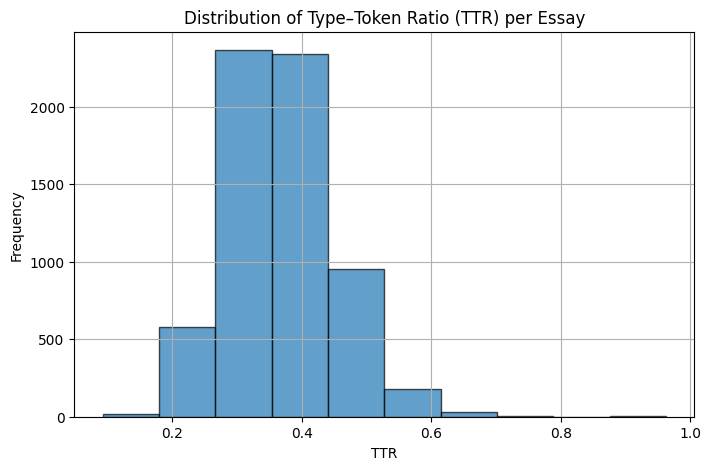

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(df['ttr'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Type–Token Ratio (TTR) per Essay')
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

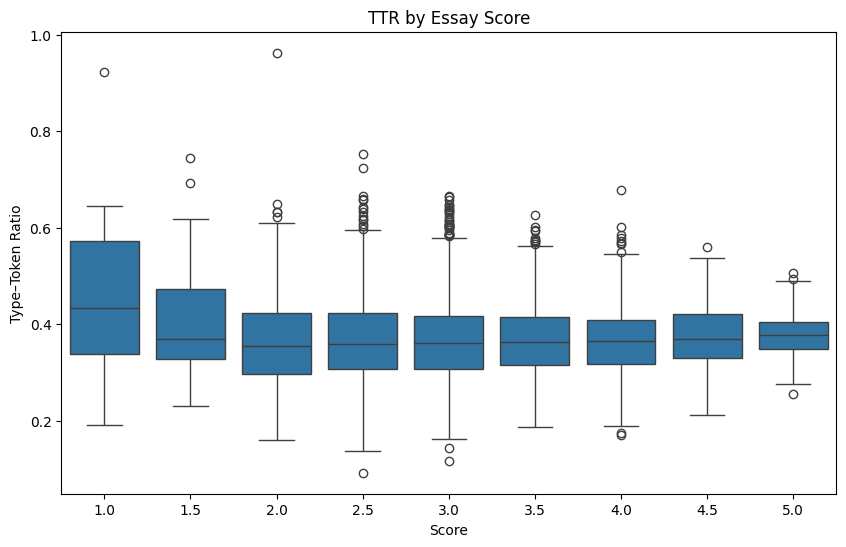

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall', y='ttr', data=df)
plt.title('TTR by Essay Score')
plt.xlabel('Score')
plt.ylabel('Type–Token Ratio')
plt.show()

<Figure size 1000x600 with 0 Axes>

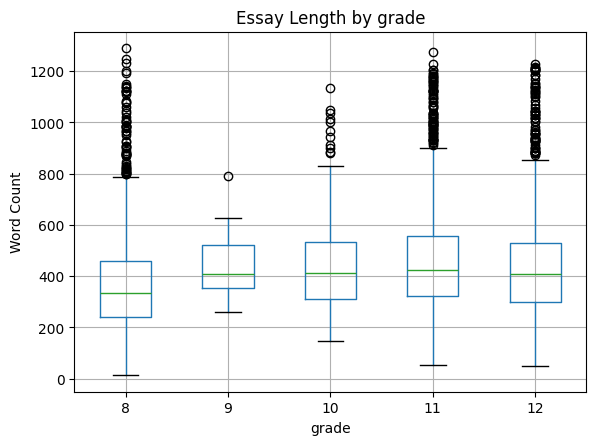

In [33]:
plt.figure(figsize=(10, 6))
df.boxplot(column='word_count', by='grade')
plt.title('Essay Length by grade')
plt.suptitle('')
plt.xlabel('grade')
plt.ylabel('Word Count')
plt.show()

От класса не зависит!

<Figure size 1000x600 with 0 Axes>

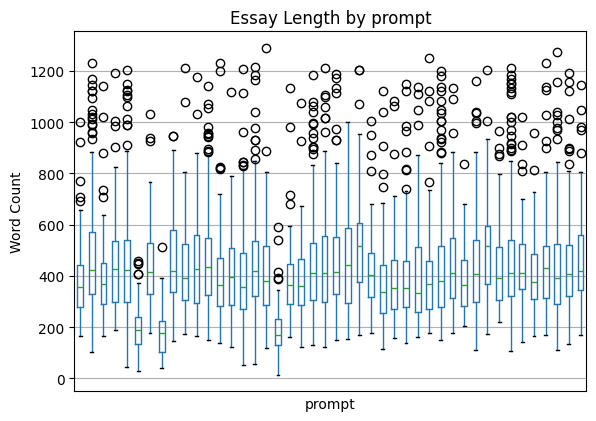

In [34]:
plt.figure(figsize=(10, 6))
df.boxplot(column='word_count', by='prompt')
plt.title('Essay Length by prompt')
plt.suptitle('')
plt.xlabel('prompt')
plt.ylabel('Word Count')
plt.xticks([], [])
plt.show()

У нас 3 набора эссе с сильно более низким количеством слов!

In [65]:
df[['prompt', 'word_count']].groupby(by='prompt').mean().sort_values(by='word_count')

,word_count
prompt,
Community service,179.216867
Grades for extracurricular activities,194.855263
Cell phones at school,199.411765
Afterschool homework club,379.917526
Seeking multiple opinions,386.203704
Imagination,386.296296
Lessons with elementary school students,387.603175
Honesty,391.296296
Lunch menus,392.874214


Community service <br>
Grades for extracurricular activities <br>
Cell phones at school <br>
Эти промпты меньше, посмотрим на тексты в них

In [49]:
df[df['prompt'] == 'Community service'].full_text[6]

"Dear Principal,\r\n\r\nOur school should have a community center. The reasons why, are so students can learn what our community needs, how to make our community better place, and why is community important for students to know. Its a great to have a community center to know how we can make things better.\r\n\r\nStudents think community center takes their time away. but they have to learn what our community needs. students will participate in a group of students making a list what our community needs, therefore students will learn what our community needs! students will present their list of things our community needs! due to that students will be giving extra credit for the ones who have low grades!\r\n\r\nSome students don't participate because their friends say its waste of time. it would not be waste of time when you get to know how our community can be a better place for us. students should know that the program is about our own lives, because if our community is bad well our live

In [52]:
df[df['prompt'] == 'Grades for extracurricular activities'].full_text[3]

"Dear, Principal\n\nIf u change the school policy of having a grade b average that unfair. Because many students have a C average. So that means that they cant go out for sports or other activities they want to do bad. That's like taking everything they have. What if kids want to become good at something, but now they cant because of that school policy. If they have a C average they should still be able to go out for sports or activities. A C average isn't that bad, its higher then a D average. If the school police was if you have a D average of lower they shouldn't do sports or activities. If they have a D average in school for not working hard, that's means that they in ain't going to try hard. If they have a C average and there trying hard they should be able to out for sports or activities. What if all the good people in sports have a C average in school, that means that they cant play and were going to lose every game we have. That's a good policy to get grade's up but don't take 

In [57]:
df[df['prompt'] == 'Cell phones at school'].full_text[70]

"To the principal:\r\n\r\nCell phone is a very popular device now a days and almost everyone use it to communicate with others. I have a cell phone my self too. I think cell phone is appropriate for student to use during lunch periods and other free times as long as they turn off their cell phone during class and use it for appropriate matters. Cell phone can help people solving matters by talking on the phone and contact when some emergency happened.\r\n\r\nCell phone can help people in many ways, as long as we have a limit on it.\r\n\r\nCell phone is a device that has many functions. It can help people in many ways. When there is an emergency at school, the best device to use to communicate with your parent to tell them you are safe, or polices to report the incident is cell phone. Cell phone is not a direct contact, but it gives the least secure to a matter such as you are safe, some specific thing happening in school, and some decision that can be solve using cell phone instead of 

Жанр обращения к директору! Неожиданно

<Figure size 1000x600 with 0 Axes>

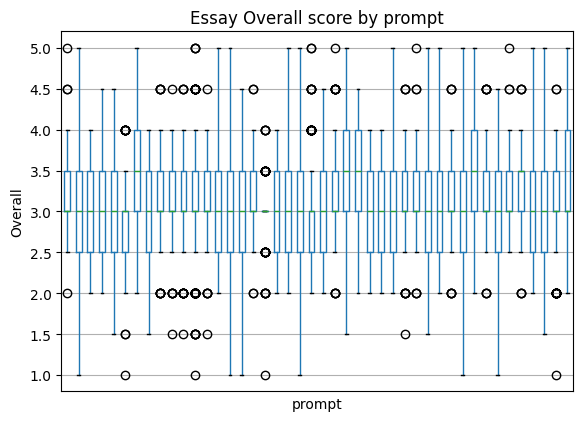

In [35]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Overall', by='prompt')
plt.title('Essay Overall score by prompt')
plt.suptitle('')
plt.xlabel('prompt')
plt.ylabel('Overall')
plt.xticks([], [])
plt.show()

Есть небольшие смещения IQR среди задач, но в целом все около среднего

<Figure size 1000x600 with 0 Axes>

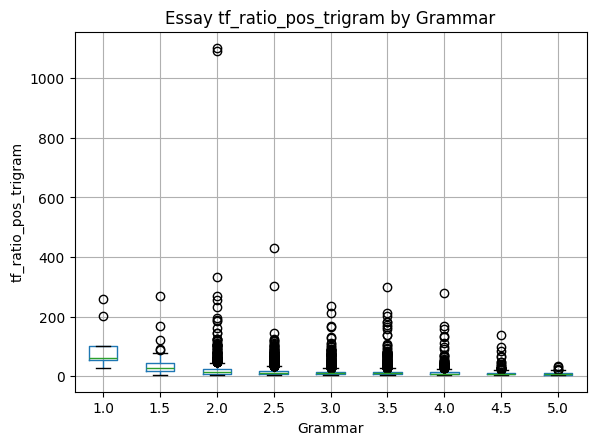

In [37]:
plt.figure(figsize=(10, 6))
df.boxplot(column='tf_ratio_pos_trigram', by='Grammar')
plt.title('Essay tf_ratio_pos_trigram by Grammar')
plt.suptitle('')
plt.xlabel('Grammar')
plt.ylabel('tf_ratio_pos_trigram')
plt.show()